# Introduction

In [1]:
import sys
sys.path.append('/home/ubuntu/tormography/src')
import numpy as np
from pytomography.algorithms import get_osem_net
from pytomography.metadata import PSFMeta
from pytomography.priors import LogCoshPrior
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

1. Create OSEM reconstruction network with output data from SIMIND, using
    * attenuation correction
    * PSF modeling
    * $\log\cosh$ prior

In [2]:
osem_net = get_osem_net(projections_header = '/home/ubuntu/test_files/projections.h00',
                        CT_header = '/home/ubuntu/test_files/CT.hct',
                        psf_meta=PSFMeta(collimator_slope=0.0301, collimator_intercept=0.00197),
                        prior = LogCoshPrior(beta=0.05),
                        device=device)

2. Reconstruct object, specifying number of iterations and subsets.

In [3]:
reconstructed_object= osem_net(n_iters=4, n_subsets=8)
reconstructed_object = reconstructed_object[0].cpu().numpy()

3. Plot maximum intensity projections of the reconstructed object.

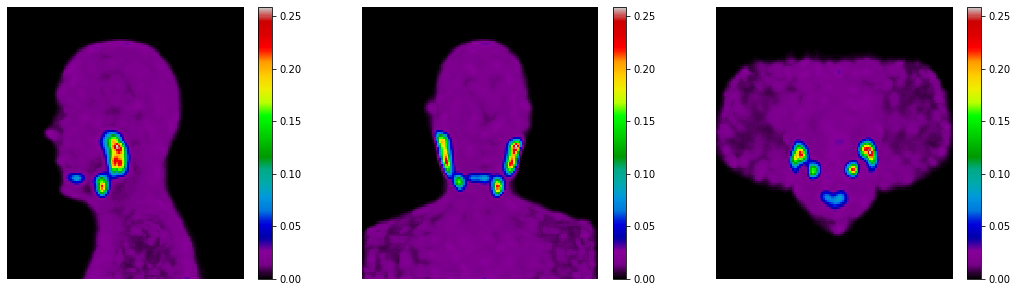

In [4]:
plt.subplots(1,3,figsize=(18,5))
plt.subplot(131)
plt.pcolormesh(reconstructed_object.max(axis=0).T, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.subplot(132)
plt.pcolormesh(reconstructed_object.max(axis=1).T, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.subplot(133)
plt.pcolormesh(reconstructed_object.max(axis=2).T, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('../images/sample_MIP.png', dpi=300)